In [1]:
import pandas as pd 
import webbrowser
import os 

#Step 1: Get the data
#reads laptop_price.csv and stores object as a dataframe object
df = pd.read_csv("data/hdbPrice.csv")
#block would not affect the price of the laptop, hence it is removed
del df['block']

#Step 2: Exploring and processing the data
#create a web page of the data for easy viewing
html = df[0:100].to_html()
filename = "data.html"
#save html to a temporary file and open web page in our browser
with open(filename,"w") as f:
    f.write(html)
full_filename = os.path.abspath(filename)
webbrowser.open("file://{}".format(full_filename))

True

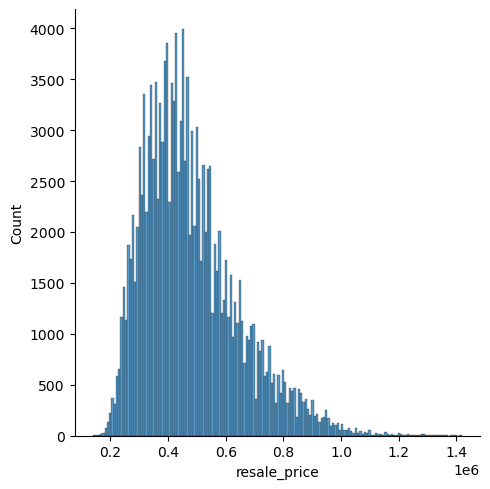

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['resale_price'])
plt.show()
#using seaborn.distplot to create histogram
#diagram below shows that most hdb's are sold at around $500,000

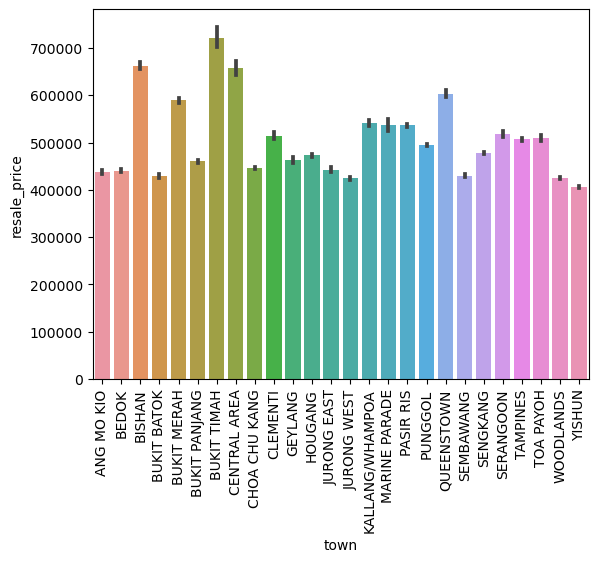

In [3]:
#check the average pricing for each hdb town type name 
sns.barplot(x=df['town'], y=df['resale_price'])
plt.xticks(rotation="vertical")
plt.show()

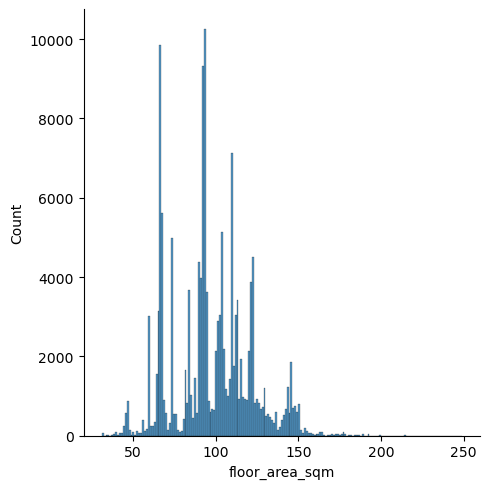

In [4]:
sns.displot(df['floor_area_sqm'])
plt.show()

#Visualising floor_area_sqm
#Can see that most houses are ~ 80sqm


In [5]:
#this shows that lease_commence_date don't really have a high correlation with the resale_price
cols = ["lease_commence_date", "resale_price"]
data = df[cols]
# create correlation matrix
corr_matrix = data.corr()

print(corr_matrix)

                     lease_commence_date  resale_price
lease_commence_date             1.000000      0.359512
resale_price                    0.359512      1.000000


In [6]:
#this shows that floor_area_sqm have a moderate to high correlation with resale price 
cols = ["floor_area_sqm", "resale_price"]
data = df[cols]
# create correlation matrix
corr_matrix = data.corr()

print(corr_matrix)

                floor_area_sqm  resale_price
floor_area_sqm        1.000000      0.612404
resale_price          0.612404      1.000000


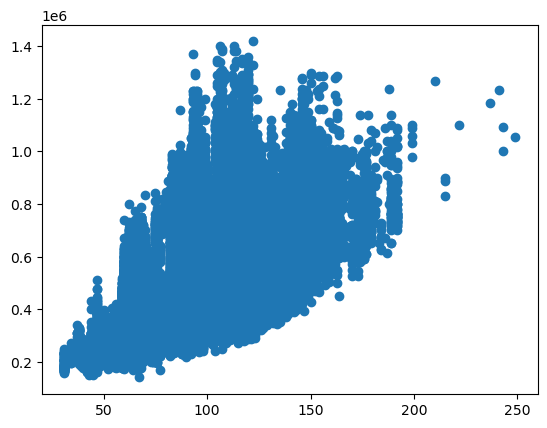

In [7]:
#check if floor_area_sqm and resale_price have a correlation, as you can see, there is a correlation between floor_area_sqm and resale_price
plt.scatter(x=df['floor_area_sqm'],y=df['resale_price'])

In [8]:
import altair as alt

# Sort the dataframe by the date column in descending order
df = df.sort_values(by="month", ascending=False)

# Filter the most recent 5000 rows of data
filtered_df = df.head(5000)


alt.Chart(data=filtered_df).mark_point().encode(
    x="floor_area_sqm",
    y="resale_price",
    color="town"
)

#Checking co-relation of floor_area_sqm to resale_price
#Since altair can only allow 5000 rows of data, I filtered df to only get the most recent 5000 rows of data
#Can conclude that the bigger the floor area of the flat, the higher the resale price will be


alt.Chart(...)

In [9]:
df['flat_room'] = df['flat_type'].str.split().str[0]
df['string_value'] = df['flat_type'].str.split().str[1]

# Drop the original 'column_name' column
df = df.drop('string_value', axis=1)
df = df.drop('flat_type', axis = 1)
# Print the results
df.head()

,month,town,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,flat_room
148276,2023-03,YISHUN,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,64 years 06 months,800000.0,EXECUTIVE
147970,2023-03,HOUGANG,UPP SERANGOON VIEW,19 TO 21,92.0,Premium Apartment,2016,92 years 01 month,698000.0,4
147958,2023-03,HOUGANG,BUANGKOK CRES,04 TO 06,93.0,Model A,2018,94 years 09 months,533000.0,4
147959,2023-03,HOUGANG,HOUGANG AVE 10,01 TO 03,91.0,New Generation,1985,61 years 08 months,450000.0,4
147960,2023-03,HOUGANG,HOUGANG AVE 4,01 TO 03,104.0,Model A,1987,63 years 02 months,515000.0,4


In [10]:
df['flat_room'] = df['flat_room'].replace(['EXECUTIVE', 'MULTI-GENERATION'], 6)

In [11]:
df['flat_room'].unique()

array([6, '4', '5', '3', '2', '1'], dtype=object)

In [12]:
df = df.drop('street_name', axis=1)

##delete street_name

In [13]:
from scipy import stats

# calculate the Spearman's rank correlation coefficient
spearman_corr, _ = stats.spearmanr(df['flat_model'], df['resale_price'])

print('Spearman\'s rank correlation coefficient: ', spearman_corr)

##spearman may not be accurate

Spearman's rank correlation coefficient:  -0.2704447188480788


In [23]:
from sklearn.model_selection import train_test_split

features_df = pd.get_dummies(df, columns = ['town', 'flat_model'])
del features_df ["resale_price"]

X = features_df.to_numpy()
y = df['resale_price'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

In [28]:
from datetime import datetime

# convert the 'month' column to integer format
df['month_int'] = df['month'].apply(lambda x: int(x.replace('-', '')))

# print the dataframe
print(df)

          month        town storey_range  floor_area_sqm         flat_model  \
148276  2023-03      YISHUN     01 TO 03           146.0         Maisonette   
147970  2023-03     HOUGANG     19 TO 21            92.0  Premium Apartment   
147958  2023-03     HOUGANG     04 TO 06            93.0            Model A   
147959  2023-03     HOUGANG     01 TO 03            91.0     New Generation   
147960  2023-03     HOUGANG     01 TO 03           104.0            Model A   
...         ...         ...          ...             ...                ...   
791     2017-01  QUEENSTOWN     19 TO 21           111.0           Improved   
792     2017-01  QUEENSTOWN     19 TO 21           110.0           Improved   
793     2017-01   SEMBAWANG     01 TO 03            86.0           Model A2   
794     2017-01   SEMBAWANG     04 TO 06           100.0            Model A   
0       2017-01  ANG MO KIO     10 TO 12            44.0           Improved   

        lease_commence_date     remaining_lease  re

In [29]:
import pandas as pd

# calculate the correlation coefficient between year_month and resale_price
corr = df['month_int'].corr(df['resale_price'])

# print the correlation coefficient
print('Correlation coefficient:', corr)


Correlation coefficient: 0.24522604009980936


In [30]:
df = df.drop('month', axis=1)

##delete month

In [31]:
print(df.head())

           town storey_range  floor_area_sqm         flat_model  \
148276   YISHUN     01 TO 03           146.0         Maisonette   
147970  HOUGANG     19 TO 21            92.0  Premium Apartment   
147958  HOUGANG     04 TO 06            93.0            Model A   
147959  HOUGANG     01 TO 03            91.0     New Generation   
147960  HOUGANG     01 TO 03           104.0            Model A   

        lease_commence_date     remaining_lease  resale_price flat_room  \
148276                 1988  64 years 06 months      800000.0         6   
147970                 2016   92 years 01 month      698000.0         4   
147958                 2018  94 years 09 months      533000.0         4   
147959                 1985  61 years 08 months      450000.0         4   
147960                 1987  63 years 02 months      515000.0         4   

        2-room  3Gen  ...  New Generation  Premium Apartment  \
148276       0     0  ...               0                  0   
147970       0    

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# create an instance of the DecisionTreeRegressor model
dt = DecisionTreeRegressor()

#Decision Tree
dt.fit(X_train,y_train)
mae_dt = mean_squared_error(y_test, dt.predict(X_test))
mse_dt = mean_absolute_error(y_test, dt.predict(X_test))
print("Mean Squared Error For Decision Tree is:", mae_dt)
print ("Mean Absolute Error for Decision Tree is:", mse_dt)

ValueError: could not convert string to float: '2019-05'